# 1. Primeiros contatos

In [1]:
# Dados de ecommerce extraídos do site Olist. Dados referentes a marketplaces
# O dataset foi baixado no link "https://www.kaggle.com/olistbr/brazilian-ecommerce"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
from scipy import stats

customers_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_orders_dataset.csv')
products_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_products_dataset.csv')
sellers_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/olist_sellers_dataset.csv')
product_category_df = pd.read_csv('Dados/Kaggle/Brazilian E-Commerce/product_category_name_translation.csv')

In [2]:
# Visualizando o df de clientes

print(customers_df.shape)

customers_df.head()

# Esse df traz informações sobre a localização do cliente

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Comparando as duas colunas 'customer_id' e 'customer_unique_id'

print(len(pd.unique(customers_df.customer_id)))
print(len(pd.unique(customers_df.customer_unique_id)))

customers_df.info()

# Vemos que há no mínimo 3 mil ids repetidos, é provavlemente de clientes que mudaram de endereço

99441
96096
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers_df.customer_city.value_counts()

sao paulo           15540
rio de janeiro       6882
belo horizonte       2773
brasilia             2131
curitiba             1521
                    ...  
embauba                 1
guimaraes               1
dois riachos            1
capivari do sul         1
prudencio thomaz        1
Name: customer_city, Length: 4119, dtype: int64

In [5]:
# Visualizando o df de geolocalização

print(geolocation_df.shape)

geolocation_df.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# Analisando a distribuição de pontos e zip codes. 'value_counts()' + 'describe()', mostra a distribuição dos valores 
# únicos, como qual a média de pontos por zip code, qnts zip codes únicos existem

geolocation_df.geolocation_zip_code_prefix.value_counts().describe().to_frame()

# Um zip code tem em média 52 pontos

,geolocation_zip_code_prefix
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


In [7]:
# Comprovando se há mesmo vários pontos para um zip code

geolocation_df[geolocation_df.geolocation_zip_code_prefix == 14409]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
334422,14409,-20.509897,-47.397866,franca,SP
334449,14409,-20.497396,-47.399241,franca,SP
334459,14409,-20.510459,-47.399553,franca,SP
334462,14409,-20.480940,-47.394161,franca,SP
334463,14409,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...
336625,14409,-20.483960,-47.403324,franca,SP
336650,14409,-20.483960,-47.403324,franca,SP
336653,14409,-20.487255,-47.405925,franca,SP
336657,14409,-20.510459,-47.399553,franca,SP


In [8]:
# DataFrame sobre os pedidos

print(order_items_df.shape)

order_items_df.head()

# Possui informaçoes da data dos pedidos, importantes para criar séries temporais

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Nº do item dentro do pedido

order_items_df.order_item_id.value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [10]:
# DataFrame sobre os pagamentos

print(order_payments_df.shape)

order_payments_df.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
# DataFrame sobre os reviews feitos

print(order_reviews_df.shape)

order_reviews_df.head()

(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
# DataFrame com informações sobre as entregas

print(orders_df.shape)

orders_df.head()

# Possui dados sobre data de compra, de despacho od item, tempo estimado e tempo de entrega

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


A tabela 'customers_df' possui o mesmo número de linhas da tabelas 'orders_df'. Pois, para cada pedido, foi criado um adicionado um id na coluna 'customers_id'.

In [13]:
# DataFrame com informações sobre o produto

print(products_df.shape)

products_df.head()

# Possui informações não apenas do produto (categoria, peso, dimensões), como também do anúncio do produto (nº de fotos, comprimento do nome)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
# Vemos que os ids do dataframe 'products_df' são únicos

len(products_df.product_id.unique())

32951

In [15]:
# DataFrame sobre os vendedores

print(sellers_df.shape)

sellers_df.head()

# Info sobre localização do vendedor

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
print(sellers_df.shape)

product_category_df.head(20)

(3095, 4)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


# 1.2 Visualização espacial

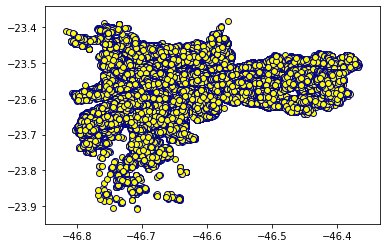

In [17]:
# Consumidores e vendodores em São Paulo

sp = geolocation_df[geolocation_df.geolocation_city == 'sao paulo']

plt.scatter(sp.geolocation_lng, sp.geolocation_lat, c = 'yellow', edgecolor = 'darkblue')
plt.show()

# Com o grande número de pontos é possível observar o tracejado do município

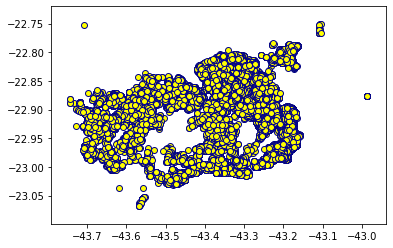

In [18]:
# Consumidores e vendodores no Rio de Janeiro

rj = geolocation_df[geolocation_df.geolocation_city == 'rio de janeiro']

plt.scatter(rj.geolocation_lng, rj.geolocation_lat, c = 'yellow', edgecolor = 'darkblue')
plt.show()

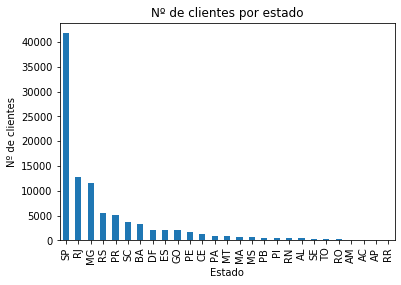

In [19]:
# Histogramas de clientes por estado

cs = customers_df.customer_state.value_counts()
cs.plot(kind='bar')
plt.ylabel('Nº de clientes')
plt.xlabel('Estado')
plt.title('Nº de clientes por estado')
plt.show()

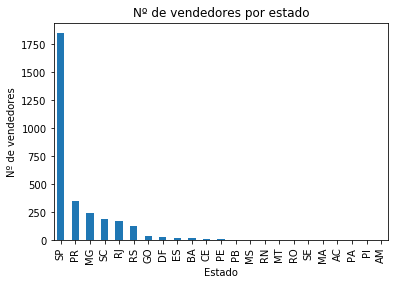

In [20]:
# Histograma de vendedores por estado

ss = sellers_df.seller_state.value_counts()
ss.plot(kind='bar')
plt.ylabel('Nº de vendedores')
plt.xlabel('Estado')
plt.title('Nº de vendedores por estado')
plt.show()

# SP lidera em número de vendedores

In [21]:
cs.sort_index()
ss.sort_index()

#ss.values/cs.values

cs_df = pd.DataFrame({'Estados':cs.index, 'Clientes': cs.values})
ss_df = pd.DataFrame({'Estados':ss.index, 'Vendedores': ss.values})

cs_ss_df = pd.merge(cs_df, ss_df, on='Estados')
cs_ss_df['Clientes por vendedores'] = round(cs_ss_df.Clientes/cs_ss_df.Vendedores,1)


print('A média nacional de clientes por vendedor', + round(cs_ss_df.Clientes.sum()/cs_ss_df.Vendedores.sum(), 1))

cs_ss_df

A média nacional de clientes por vendedor 31.9


,Estados,Clientes,Vendedores,Clientes por vendedores
0,SP,41746,1849,22.6
1,RJ,12852,171,75.2
2,MG,11635,244,47.7
3,RS,5466,129,42.4
4,PR,5045,349,14.5
5,SC,3637,190,19.1
6,BA,3380,19,177.9
7,DF,2140,30,71.3
8,ES,2033,23,88.4
9,GO,2020,40,50.5


São Paulo concentra a compra e venda nos marktplaces. O estado do Paraná possui a maior concentração relativa de vendedores. Vemos que estados do nordeste possuem menos vendedores por cliente do que os estados do sul e sudeste.

# 1.3 Adicionando variáveis

# 1.3.1 Macro categorias de produtos

In [22]:
# Há um número excessivo de categorias (74), precisamos criar uma outra coluna e agrupa-las

category_unique = products_df.product_category_name.unique()

print(len(category_unique))
category_unique

74


array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [23]:
# A partir do agrupamento feito pelo Mercado Livre e pela Amazon, foram criadas essas macro categorias

macro_category = np.array(['beleza e cuidados pessoais', 'arte', 'esporte e lazer', 'bebês', 'casa, móveis e decoração',\
                  'brinquedos e hobbies', 'arte', 'casa, móveis e decoração', 'cozinha', 'brinquedos e hobbies',\
                 'casa, móveis e decoração', 'ferramentas e construção', 'informática', 'beleza e cuidados pessoais',\
                 'roupas, calçados e acessórios', 'ferramentas e construção', 'casa, móveis e decoração',\
                 'automotivo', 'eletrônicos, tv e áudio', 'roupas, calçados e acessórios', 'celulares e telefones',\
                 'papelaria', 'roupas, calçados e acessórios', 'informática', 'ferramentas e construção',\
                  'roupas, calçados e acessórios', 'ferramentas e construção', 'pet_shop', 'eletrônicos, tv e áudio', 'agro',\
                 'nan', 'casa, móveis e decoração', 'outros', 'outros', 'games', 'livros', 'ferramentas e construção',\
                 'roupas, calçados e acessórios', 'roupas, calçados e acessórios', 'casa, móveis e decoração',\
                 'outros','celulares e telefones', 'ferramentas e construção', 'livros', 'cozinha',\
                'brinquedos e hobbies', 'alimentos e bebidas', 'outros', 'cozinha', 'ferramentas e construção',\
                'roupas, calçados e acessórios', 'casa, móveis e decoração', 'eletrônicos, tv e áudio',\
                'alimentos e bebidas', 'eletrônicos, tv e áudio', 'alimentos e bebidas', 'outros', 'livros',\
                'cozinha', 'esporte e lazer', 'casa, móveis e decoração', 'roupas, calçados e acessórios',\
                'eletrônicos, tv e áudio', 'arte', 'informática', 'casa, móveis e decoração', 'outros', 'bebês',\
                'outros', 'casa, móveis e decoração', 'cozinha', 'outros', 'casa, móveis e decoração',\
                'eletrônicos, tv e áudio'])


len(macro_category)

74

In [24]:
# Vemos que dos 32 mil produtos, 600 não possuem categoria. Essa não categorização é um erro randomico ou esses produtos
# são diferentes? Iremos testar isso mais a frente

products_df[products_df.product_category_name.isnull()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [25]:
# Criando o dataframe com categorias únicas e macro categorias

macro_category_df = pd.DataFrame({'macro_category':macro_category, 'product_category_name':category_unique})

print(len(macro_category_df.macro_category.unique()))

macro_category_df

21


,macro_category,product_category_name
0,beleza e cuidados pessoais,perfumaria
1,arte,artes
2,esporte e lazer,esporte_lazer
3,bebês,bebes
4,"casa, móveis e decoração",utilidades_domesticas
...,...,...
69,"casa, móveis e decoração",casa_conforto_2
70,cozinha,portateis_cozinha_e_preparadores_de_alimentos
71,outros,seguros_e_servicos
72,"casa, móveis e decoração",moveis_colchao_e_estofado


In [26]:
# Unindo as tabelas macro_category_df, com as novas categorizaçoes, à tabela com products_df, com os ids únicos de produto

products_df = pd.merge(products_df, macro_category_df, on='product_category_name')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,macro_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,beleza e cuidados pessoais
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,beleza e cuidados pessoais
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,beleza e cuidados pessoais
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,beleza e cuidados pessoais
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,beleza e cuidados pessoais
...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,"casa, móveis e decoração"
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,"casa, móveis e decoração"
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,"casa, móveis e decoração"
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,"casa, móveis e decoração"


In [27]:
# Unindo a tabela products_df, com os ids únicos de produto, a tabela 'order_items_df' com pedidos (ids repetidos)

produtos_pedidos = pd.merge(products_df, order_items_df, on='product_id')
produtos_pedidos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,macro_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,beleza e cuidados pessoais,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,beleza e cuidados pessoais,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,beleza e cuidados pessoais,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,beleza e cuidados pessoais,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,beleza e cuidados pessoais,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,"eletrônicos, tv e áudio",7ed69fbc79fbda50e09caa9c127026e5,1,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58
112646,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,"eletrônicos, tv e áudio",9c782cb7854e5dfa91927cfca8949eb8,1,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11
112647,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,"eletrônicos, tv e áudio",cea54c1853c864ab36cea3ef732d7191,1,4e922959ae960d389249c378d1c939f5,2017-11-14 11:50:17,65.00,9.94
112648,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,"eletrônicos, tv e áudio",d4e8d3bb5e3673ed68ac154fe86de946,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11


In [28]:
produtos_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
product_id                    112650 non-null object
product_category_name         111047 non-null object
product_name_lenght           111047 non-null float64
product_description_lenght    111047 non-null float64
product_photos_qty            111047 non-null float64
product_weight_g              112632 non-null float64
product_length_cm             112632 non-null float64
product_height_cm             112632 non-null float64
product_width_cm              112632 non-null float64
macro_category                112650 non-null object
order_id                      112650 non-null object
order_item_id                 112650 non-null int64
seller_id                     112650 non-null object
shipping_limit_date           112650 non-null object
price                         112650 non-null float64
freight_value                 112650 non-null float64
dtypes: float64(9), int64(1), obj

In [29]:
# Verificando se a categorização está correta

print(produtos_pedidos[produtos_pedidos.macro_category == 'casa, móveis e decoração'].product_category_name.unique())
print('\n')
print(produtos_pedidos[produtos_pedidos.macro_category == 'beleza e cuidados pessoais'].product_category_name.unique())

['utilidades_domesticas' 'moveis_decoracao' 'cama_mesa_banho'
 'moveis_escritorio' 'moveis_sala'
 'moveis_cozinha_area_de_servico_jantar_e_jardim' 'casa_conforto'
 'artigos_de_natal' 'moveis_quarto' 'casa_conforto_2'
 'moveis_colchao_e_estofado']


['perfumaria' 'beleza_saude']


In [30]:
# Agregando por macro categoria

produtos_pedidos_macro_cat = produtos_pedidos.macro_category.value_counts()
produtos_pedidos_macro_cat = produtos_pedidos_macro_cat.to_frame()
produtos_pedidos_macro_cat.reset_index(inplace=True)
produtos_pedidos_macro_cat.rename(columns = {'index':'macro_category', 'macro_category':'quantidade'}, inplace=True)
produtos_pedidos_macro_cat.set_index('macro_category', inplace=True)

produtos_pedidos_macro_cat.head(21)

,quantidade
macro_category,
"casa, móveis e decoração",29652
beleza e cuidados pessoais,13089
"roupas, calçados e acessórios",9695
esporte e lazer,8671
informática,8039
ferramentas e construção,6719
brinquedos e hobbies,4840
celulares e telefones,4809
automotivo,4235


In [31]:
# As 10 primeiras macro categorias totalizam 83% do total de produtos

print(produtos_pedidos_macro_cat.head(10).quantidade.sum() / produtos_pedidos_macro_cat.quantidade.sum())
print(produtos_pedidos_macro_cat.head(1).quantidade.sum() / produtos_pedidos_macro_cat.quantidade.sum())

0.8324722592099423
0.2632223701731025


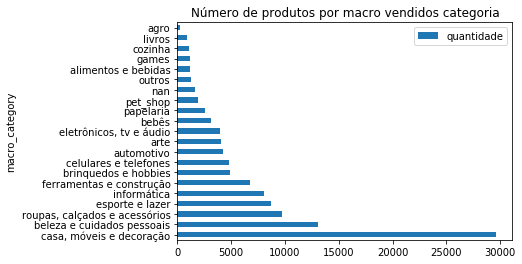

In [32]:
# Visualizando o número de produtos vendidos por macro categoria

produtos_pedidos_macro_cat.plot(kind='barh')
plt.title('Número de produtos por macro vendidos categoria')
plt.show()

# Produtos para casa, beleza e roupas lideram

In [33]:
# Visualizando as 20 categorias com maior número de produtos

produtos_pedidos_cat = produtos_pedidos.product_category_name.value_counts()
produtos_pedidos_cat = produtos_pedidos_cat.to_frame()
produtos_pedidos_cat.reset_index(inplace=True)
produtos_pedidos_cat.rename(columns = {'index':'product_category_name', 'product_category_name':'quantidade'}, inplace=True)
produtos_pedidos_cat.set_index('product_category_name', inplace=True)

produtos_pedidos_cat.head(20)

,quantidade
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
utilidades_domesticas,6964
relogios_presentes,5991
telefonia,4545
ferramentas_jardim,4347


# 1.3.2 Tempo total de entrega

In [34]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [35]:
# Transformando as colunas com informação de data e horário de string para datetime

from datetime import datetime 

orders_df.order_purchase_timestamp = pd.to_datetime(orders_df.order_purchase_timestamp)
orders_df.order_approved_at = pd.to_datetime(orders_df.order_approved_at)
orders_df.order_delivered_carrier_date = pd.to_datetime(orders_df.order_delivered_carrier_date)
orders_df.order_delivered_customer_date	 = pd.to_datetime(orders_df.order_delivered_customer_date)
orders_df.order_estimated_delivery_date	 = pd.to_datetime(orders_df.order_estimated_delivery_date)

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [36]:
# Criando coluna de tempo entre a compra e a aprovação

orders_df['purchase_to_approve'] = orders_df.order_approved_at - orders_df.order_purchase_timestamp
orders_df.purchase_to_approve

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Name: purchase_to_approve, Length: 99441, dtype: timedelta64[ns]

In [37]:
# Tempo total de entrega

orders_df['total_delivery_time'] = orders_df.order_delivered_customer_date - orders_df.order_purchase_timestamp
orders_df.total_delivery_time

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Name: total_delivery_time, Length: 99441, dtype: timedelta64[ns]

In [38]:
# Tempo total estimado de entrega

orders_df['total_estimated_time'] = orders_df.order_estimated_delivery_date - orders_df.order_purchase_timestamp
orders_df.total_estimated_time

0       15 days 13:03:27
1       19 days 03:18:23
2       26 days 15:21:11
3       26 days 04:31:54
4       12 days 02:41:21
              ...       
99436   18 days 14:05:55
99437   23 days 11:01:02
99438   30 days 09:13:17
99439   37 days 02:31:33
99440   25 days 03:02:30
Name: total_estimated_time, Length: 99441, dtype: timedelta64[ns]

In [39]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approve,total_delivery_time,total_estimated_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,8 days 10:28:40,15 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,13 days 18:46:08,19 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,9 days 09:27:40,26 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,13 days 05:00:36,26 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,2 days 20:58:23,12 days 02:41:21
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0 days 00:00:00,8 days 05:13:56,18 days 14:05:55
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,22 days 04:38:58,23 days 11:01:02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,24 days 20:37:34,30 days 09:13:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,37 days 02:31:33


In [40]:
# Tempo médio estimado de entrega x tempo médio observado de entrega

print(orders_df.total_estimated_time.mean())
print(orders_df.total_delivery_time.mean())

(orders_df.total_estimated_time.mean()/orders_df.total_delivery_time.mean())

23 days 18:25:24.953530
12 days 13:24:31.879068


1.8925243508230913

Tempo estimado é 89%, quase duas vezes, maior do que o tempo, será que conseguimos criar uma estimação melhor?

# 1.3.3 Distância entre o vendedor e o cliente

# 1.3.3.1 Inserir coordenada por CEP

In [41]:
# Tabela 'sellers_df' possui os CEPs dos vendedores mas não as coordenadas

sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [42]:
# A tabela de geolocalização não indica o vendedor ou consumidor que está naquele ponto

geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [43]:
# Visualizando CEPs mais frequentes

geolocation_df.geolocation_zip_code_prefix.value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
73990       1
87307       1
72450       1
24877       1
38198       1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

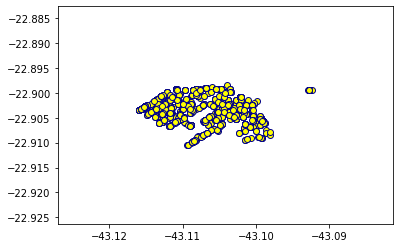

In [44]:
# Visualizando a distribuição de pontos em um CEP

cep = geolocation_df[geolocation_df.geolocation_zip_code_prefix == 24220]

plt.scatter(cep.geolocation_lng, cep.geolocation_lat, c = 'yellow', edgecolor = 'darkblue')
plt.show()

In [45]:
# Podemos tirar a média das coordenadas por CEP

print(cep.mean())
cep

geolocation_zip_code_prefix    24220.000000
geolocation_lat                  -22.903245
geolocation_lng                  -43.107024
dtype: float64


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ
...,...,...,...,...,...
474265,24220,-22.904023,-43.111683,niteroi,RJ
474266,24220,-22.905393,-43.100512,niterói,RJ
474269,24220,-22.906420,-43.104933,niteroi,RJ
474270,24220,-22.909701,-43.108452,niteroi,RJ


In [46]:
# Gerando dois dicionarios , com as médias de latitute e longitudes por cep

cep_list = geolocation_df.geolocation_zip_code_prefix.unique()
cep_lat = {}
cep_lng = {}

for i in cep_list:
    lat_mean = geolocation_df[geolocation_df.geolocation_zip_code_prefix == i].geolocation_lat.mean()
    cep_lat[i] = lat_mean
    
for i in cep_list:
    lng_mean = geolocation_df[geolocation_df.geolocation_zip_code_prefix == i].geolocation_lng.mean()
    cep_lng[i] = lng_mean

In [47]:
cep_lat

{1037: -23.545411016454086,
 1046: -23.545930039168788,
 1041: -23.54390458746036,
 1035: -23.541614488738958,
 1012: -23.547789733146864,
 1047: -23.54618760708176,
 1013: -23.547142028323904,
 1029: -23.54137304898053,
 1011: -23.546908640251115,
 1032: -23.540124454559958,
 1014: -23.545912805690424,
 1039: -23.54137085777194,
 1024: -23.54140143278026,
 1009: -23.546835208320854,
 1020: -23.55233565155142,
 1043: -23.545765991186382,
 1050: -23.549229163580517,
 1045: -23.542345366178562,
 1007: -23.550046202351673,
 1005: -23.549456199830747,
 1017: -23.549531271947856,
 1019: -23.551774137807588,
 1027: -23.538082328385332,
 1033: -23.5392714370778,
 1006: -23.550101811452866,
 1034: -23.542515317419948,
 1042: -23.544852949531748,
 1040: -23.541028179008823,
 1026: -23.53965712727096,
 1036: -23.54164845233629,
 1048: -23.54711318884073,
 1002: -23.54814573176355,
 1031: -23.541905853440447,
 1022: -23.544921826153427,
 1008: -23.546001749383464,
 1010: -23.546389438369268,
 100

In [48]:
cep_lng

{1037: -46.63892437204837,
 1046: -46.6439975177819,
 1041: -46.64004648644473,
 1035: -46.64154914252655,
 1012: -46.63485900505736,
 1047: -46.64106743356166,
 1013: -46.63423580006205,
 1029: -46.633415988443026,
 1011: -46.63558202636042,
 1032: -46.635193543797676,
 1014: -46.633615371244936,
 1039: -46.639165288851196,
 1024: -46.62990400057277,
 1009: -46.6364906953122,
 1020: -46.63004970984574,
 1043: -46.64150246454141,
 1050: -46.64303023455156,
 1045: -46.64252697570119,
 1007: -46.63725145963765,
 1005: -46.63673294803691,
 1017: -46.63102384555222,
 1019: -46.63089338270139,
 1027: -46.630668675067795,
 1033: -46.63587808421484,
 1006: -46.636136735174176,
 1034: -46.63736744880091,
 1042: -46.640410456031695,
 1040: -46.638324694969405,
 1026: -46.63188421270581,
 1036: -46.64144327735932,
 1048: -46.63983987489639,
 1002: -46.63497921074498,
 1031: -46.63508761691669,
 1022: -46.63193133561195,
 1008: -46.63588592135779,
 1010: -46.635226081509046,
 1003: -46.6357313099

In [49]:
# Transformando os dicionarios m data frame e unindo-os

cep_lat_df = pd.DataFrame(cep_lat.items(), columns=['cep', 'avg_lat'])
cep_lng_df = pd.DataFrame(cep_lng.items(), columns=['cep', 'avg_lng'])

cep_geoloc = cep_lat_df.merge(cep_lng_df)
cep_geoloc

,cep,avg_lat,avg_lng
0,1037,-23.545411,-46.638924
1,1046,-23.545930,-46.643998
2,1041,-23.543905,-46.640046
3,1035,-23.541614,-46.641549
4,1012,-23.547790,-46.634859
...,...,...,...
19010,99955,-28.113341,-52.143843
19011,99970,-28.343766,-51.874689
19012,99910,-27.858961,-52.075287
19013,99920,-27.855254,-52.300906


In [50]:
# Testando se os valores do CEP 24220 na tabela são os mesmo valores encontrados acima

print(geolocation_df[geolocation_df.geolocation_zip_code_prefix == 24220].mean())

print(cep_geoloc[cep_geoloc.cep == 24220])

geolocation_zip_code_prefix    24220.000000
geolocation_lat                  -22.903245
geolocation_lng                  -43.107024
dtype: float64
        cep    avg_lat    avg_lng
6834  24220 -22.903245 -43.107024


In [51]:
# Segundo teste

teste_2 = geolocation_df[geolocation_df.geolocation_zip_code_prefix == 38400]

print(geolocation_df[geolocation_df.geolocation_zip_code_prefix == 38400].mean())

print(cep_geoloc[cep_geoloc.cep == 38400])

geolocation_zip_code_prefix    38400.000000
geolocation_lat                  -18.913248
geolocation_lng                  -48.278212
dtype: float64
        cep    avg_lat    avg_lng
9536  38400 -18.913248 -48.278212


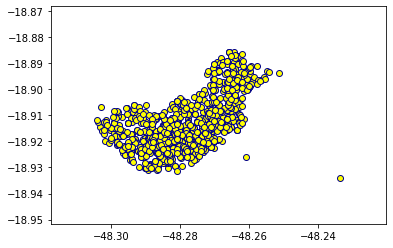

In [52]:
# Plotando todo os pontos do CEP 38400

plt.scatter(teste_2.geolocation_lng, teste_2.geolocation_lat, c = 'yellow', edgecolor = 'darkblue')

# Vemos que a média dos pontos é compatível com a distrbuição 

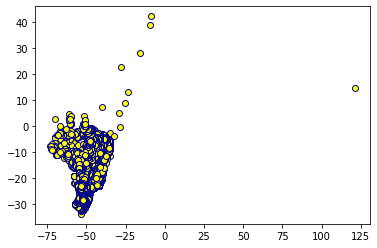

In [53]:
# Visualizando a distruibuição espacial dos pontos

plt.scatter(cep_geoloc.avg_lng, cep_geoloc.avg_lat, c = 'yellow', edgecolor = 'darkblue')

In [54]:
# Inserindo as coordenadas de cada CEP na tabela de vendedores

sellers_df = pd.merge(sellers_df, cep_geoloc, how='left', left_on='seller_zip_code_prefix', right_on='cep')
sellers_df.drop(columns=['cep'], inplace=True)
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,avg_lat,avg_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419
...,...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.448041,-51.869960
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,-27.656421,-48.665840
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.657851,-46.676925
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.751072,-52.323202


In [55]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 6 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
avg_lat                   3088 non-null float64
avg_lng                   3088 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 169.3+ KB


In [56]:
# Agora inserindo as coordenadas na tabela dos clientes

customers_df = pd.merge(customers_df, cep_geoloc,how='left', left_on='customer_zip_code_prefix', right_on='cep')
customers_df.drop(columns=['cep'], inplace=True)
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_lat,avg_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.586003,-46.499638
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.615830,-46.768533
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.734569,-38.510534
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.949839,-51.168494


In [57]:
# Unindo a tabela 'orders_df' com a 'customers_df', para ligar o pedido ao destino do pedido

orders_and_customers = pd.merge(orders_df, customers_df, how='left', on='customer_id')
orders_and_customers.rename(columns={'avg_lat':'avg_lat_customer', 'avg_lng':'avg_lng_customer'}, inplace=True)
orders_and_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approve,total_delivery_time,total_estimated_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,avg_lat_customer,avg_lng_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,8 days 10:28:40,15 days 13:03:27,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,13 days 18:46:08,19 days 03:18:23,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,9 days 09:27:40,26 days 15:21:11,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,13 days 05:00:36,26 days 04:31:54,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,2 days 20:58:23,12 days 02:41:21,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676370,-46.514627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0 days 00:00:00,8 days 05:13:56,18 days 14:05:55,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,-23.178000,-45.883818
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,22 days 04:38:58,23 days 11:01:02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-24.001500,-46.449864
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,24 days 20:37:34,30 days 09:13:17,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-17.898358,-39.373630
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,37 days 02:31:33,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.562825,-42.694574


In [58]:
orders_and_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 17 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
purchase_to_approve              99281 non-null timedelta64[ns]
total_delivery_time              96476 non-null timedelta64[ns]
total_estimated_time             99441 non-null timedelta64[ns]
customer_unique_id               99441 non-null object
customer_zip_code_prefix         99441 non-null int64
customer_city                    99441 non-null object
customer_state                   99441 non-null object


In [59]:
# Unindo as informações de pedidos e clientes, com as de produtos

df = pd.merge(orders_and_customers, produtos_pedidos, on='order_id')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approve,total_delivery_time,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,macro_category,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,8 days 10:28:40,...,500.0,19.0,8.0,13.0,"casa, móveis e decoração",1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,13 days 18:46:08,...,400.0,19.0,13.0,19.0,beleza e cuidados pessoais,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,9 days 09:27:40,...,420.0,24.0,19.0,21.0,automotivo,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,13 days 05:00:36,...,450.0,30.0,10.0,20.0,pet_shop,1,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,2 days 20:58:23,...,250.0,51.0,15.0,15.0,papelaria,1,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,22 days 04:38:58,...,4950.0,40.0,10.0,40.0,bebês,1,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,24 days 20:37:34,...,13300.0,32.0,90.0,22.0,cozinha,1,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,...,6550.0,20.0,20.0,20.0,informática,1,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,...,6550.0,20.0,20.0,20.0,informática,2,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 32 columns):
order_id                         112650 non-null object
customer_id                      112650 non-null object
order_status                     112650 non-null object
order_purchase_timestamp         112650 non-null datetime64[ns]
order_approved_at                112635 non-null datetime64[ns]
order_delivered_carrier_date     111456 non-null datetime64[ns]
order_delivered_customer_date    110196 non-null datetime64[ns]
order_estimated_delivery_date    112650 non-null datetime64[ns]
purchase_to_approve              112635 non-null timedelta64[ns]
total_delivery_time              110196 non-null timedelta64[ns]
total_estimated_time             112650 non-null timedelta64[ns]
customer_unique_id               112650 non-null object
customer_zip_code_prefix         112650 non-null int64
customer_city                    112650 non-null object
customer_state                   112650

In [61]:
# Inserindo informações dos vendedores para ligar o pedido à origem do pedido

df = pd.merge(df, sellers_df, how='left', on='seller_id')
df.rename(columns={'avg_lat':'avg_lat_seller', 'avg_lng':'avg_lng_seller'}, inplace=True)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approve,total_delivery_time,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,avg_lat_seller,avg_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,8 days 10:28:40,...,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,-23.680729,-46.444238
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,13 days 18:46:08,...,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP,-19.807681,-43.980427
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,9 days 09:27:40,...,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,13 days 05:00:36,...,1,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,belo horizonte,MG,-19.837682,-43.924053
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,2 days 20:58:23,...,1,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,mogi das cruzes,SP,-23.543395,-46.262086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,22 days 04:38:58,...,1,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602,tupa,SP,-21.930548,-50.498348
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,24 days 20:37:34,...,1,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290,sao paulo,SP,-23.553642,-46.452661
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,...,1,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG,-20.940578,-45.827237
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,...,2,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG,-20.940578,-45.827237


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 37 columns):
order_id                         112650 non-null object
customer_id                      112650 non-null object
order_status                     112650 non-null object
order_purchase_timestamp         112650 non-null datetime64[ns]
order_approved_at                112635 non-null datetime64[ns]
order_delivered_carrier_date     111456 non-null datetime64[ns]
order_delivered_customer_date    110196 non-null datetime64[ns]
order_estimated_delivery_date    112650 non-null datetime64[ns]
purchase_to_approve              112635 non-null timedelta64[ns]
total_delivery_time              110196 non-null timedelta64[ns]
total_estimated_time             112650 non-null timedelta64[ns]
customer_unique_id               112650 non-null object
customer_zip_code_prefix         112650 non-null int64
customer_city                    112650 non-null object
customer_state                   112650

In [63]:
# Retirando linhas sem as coordenadas

df = df.dropna(subset=['avg_lat_customer', 'avg_lng_customer', 'avg_lat_seller', 'avg_lng_seller'])
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112096 entries, 0 to 112095
Data columns (total 37 columns):
order_id                         112096 non-null object
customer_id                      112096 non-null object
order_status                     112096 non-null object
order_purchase_timestamp         112096 non-null datetime64[ns]
order_approved_at                112081 non-null datetime64[ns]
order_delivered_carrier_date     110913 non-null datetime64[ns]
order_delivered_customer_date    109660 non-null datetime64[ns]
order_estimated_delivery_date    112096 non-null datetime64[ns]
purchase_to_approve              112081 non-null timedelta64[ns]
total_delivery_time              109660 non-null timedelta64[ns]
total_estimated_time             112096 non-null timedelta64[ns]
customer_unique_id               112096 non-null object
customer_zip_code_prefix         112096 non-null int64
customer_city                    112096 non-null object
customer_state                   112096

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 1.3.3.2 Converter diferença entre coordenadas para quilômetros

In [64]:
# Criando tuplas com as informações necessarias para se definir um ponto (latitude e longitude), para vendedores e clientes

seller_point = list(zip(df.avg_lat_seller, df.avg_lng_seller))
customer_point = list(zip(df.avg_lat_customer, df.avg_lng_customer))
len(seller_point)

112096

In [65]:
# Testando as tuplas, comparando os valores zipados, com os valores da tabela, para ver se a zipagem funcionou corretamente

x=0

for i in range(len(seller_point)):
    if (seller_point[i] == (df.avg_lat_seller[i], df.avg_lng_seller[i])) == True:
        x += 1
    else:
        x += 0
print(x)

112096


In [66]:
# Transformando as tuplas em distance percorrida pela entrega

from geopy import distance
distance_kms = []

for i in range(len(seller_point)):
    distance_kms.append(distance.distance(seller_point[i], customer_point[i]).km)
print(len(distance_kms))

112096


In [67]:
# Inserindo as distancias calculadas na tabela 'df'

df['distance'] = distance_kms
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112096 entries, 0 to 112095
Data columns (total 38 columns):
order_id                         112096 non-null object
customer_id                      112096 non-null object
order_status                     112096 non-null object
order_purchase_timestamp         112096 non-null datetime64[ns]
order_approved_at                112081 non-null datetime64[ns]
order_delivered_carrier_date     110913 non-null datetime64[ns]
order_delivered_customer_date    109660 non-null datetime64[ns]
order_estimated_delivery_date    112096 non-null datetime64[ns]
purchase_to_approve              112081 non-null timedelta64[ns]
total_delivery_time              109660 non-null timedelta64[ns]
total_estimated_time             112096 non-null timedelta64[ns]
customer_unique_id               112096 non-null object
customer_zip_code_prefix         112096 non-null int64
customer_city                    112096 non-null object
customer_state                   112096

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approve,total_delivery_time,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,avg_lat_seller,avg_lng_seller,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,8 days 10:28:40,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,-23.680729,-46.444238,18.566632
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,13 days 18:46:08,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP,-19.807681,-43.980427,847.437333
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,9 days 09:27:40,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP,-21.363502,-48.229601,512.100044
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,13 days 05:00:36,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,belo horizonte,MG,-19.837682,-43.924053,1816.085655
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,2 days 20:58:23,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,mogi das cruzes,SP,-23.543395,-46.262086,29.684401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112091,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0 days 00:11:39,22 days 04:38:58,...,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602,tupa,SP,-21.930548,-50.498348,474.258311
112092,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0 days 00:17:33,24 days 20:37:34,...,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290,sao paulo,SP,-23.553642,-46.452661,966.946999
112093,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,...,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG,-20.940578,-45.827237,370.482603
112094,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0 days 00:07:54,17 days 02:04:27,...,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175,ilicinea,MG,-20.940578,-45.827237,370.482603


In [69]:
# Média da distancia das entregas, em kms

print(df.distance.mean())

595.8111609042336


# 2. Estatisticas Descritivas

# 2.1 Frequência das compras

# 2.1.1 Frequência dentro de 24 horas

In [70]:
df.order_purchase_timestamp

0        2017-10-02 10:56:33
1        2018-07-24 20:41:37
2        2018-08-08 08:38:49
3        2017-11-18 19:28:06
4        2018-02-13 21:18:39
                 ...        
112091   2018-02-06 12:58:58
112092   2017-08-27 14:46:43
112093   2018-01-08 21:28:27
112094   2018-01-08 21:28:27
112095   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 112096, dtype: datetime64[ns]

In [71]:
hour_purchase = df.order_purchase_timestamp.apply(lambda x: x.hour)
hour_purchase

0         10
1         20
2          8
3         19
4         21
          ..
112091    12
112092    14
112093    21
112094    21
112095    20
Name: order_purchase_timestamp, Length: 112096, dtype: int64

In [72]:
#hour_purchase = df.order_purchase_timestamp.apply(lambda x: x.strftime('%H-%M'))

In [73]:
hour_purchase = hour_purchase.value_counts().to_frame().reset_index()
hour_purchase

,index,order_purchase_timestamp
0,16,7609
1,14,7540
2,11,7398
3,13,7363
4,15,7341
5,10,6990
6,17,6982
7,21,6881
8,20,6837
9,12,6777


In [74]:
hour_purchase.rename(columns={'index':'Horário', 'order_purchase_timestamp':'Número de compras'}, inplace=True)

In [75]:
hour_purchase.sort_values(by='Horário', inplace=True)
#hour_purchase.set_index('Horário', inplace=True)
hour_purchase

,Horário,Número de compras
16,0,2707
18,1,1284
19,2,583
21,3,311
22,4,243
23,5,218
20,6,552
17,7,1369
15,8,3359
13,9,5419


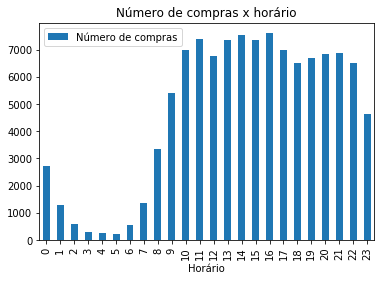

In [76]:
hour_purchase.plot(x='Horário', y='Número de compras', kind='bar')
plt.title('Número de compras x horário')
plt.show()

# Vemos que entre as 13 e às 16 horas, há o maior volume de compras. Esse pico, porém não é destacado, havendo uma certa estabilidade do volum de compras entre as 10 e as 22 

# 2.1.2 Série de vendas por dia

In [77]:
# Dias das compras (string)

dias = df.order_purchase_timestamp.apply(lambda x: x.strftime("%d-%m-%Y"))
dias

0         02-10-2017
1         24-07-2018
2         08-08-2018
3         18-11-2017
4         13-02-2018
             ...    
112091    06-02-2018
112092    27-08-2017
112093    08-01-2018
112094    08-01-2018
112095    08-03-2018
Name: order_purchase_timestamp, Length: 112096, dtype: object

In [78]:
# Dias das compras (datetime)

dias_datetime = dias.apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))
dias_datetime

0        2017-10-02
1        2018-07-24
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
112091   2018-02-06
112092   2017-08-27
112093   2018-01-08
112094   2018-01-08
112095   2018-03-08
Name: order_purchase_timestamp, Length: 112096, dtype: datetime64[ns]

In [79]:
compras_tds_dias = dias_datetime.value_counts().to_frame().sort_index()
compras_tds_dias

,order_purchase_timestamp
2016-09-04,2
2016-09-05,1
2016-09-15,3
2016-10-02,1
2016-10-03,8
...,...
2018-08-26,81
2018-08-27,70
2018-08-28,45
2018-08-29,16


In [80]:
compras_tds_dias.rename(columns={'order_purchase_timestamp':'Nº de compras'}, inplace=True)
compras_tds_dias

,Nº de compras
2016-09-04,2
2016-09-05,1
2016-09-15,3
2016-10-02,1
2016-10-03,8
...,...
2018-08-26,81
2018-08-27,70
2018-08-28,45
2018-08-29,16


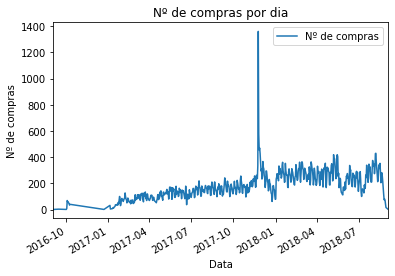

In [81]:
compras_tds_dias.plot()
plt.ylabel('Nº de compras')
plt.xlabel('Data')
plt.title('Nº de compras por dia')
plt.show()

# Há um claro crescimento, com um pico durante o natal de 2017

In [82]:
# Buscando data e número de compras do pico visto no gráfico

compras_tds_dias[compras_tds_dias['Nº de compras'] == compras_tds_dias['Nº de compras'].max()]

,Nº de compras
2017-11-24,1361


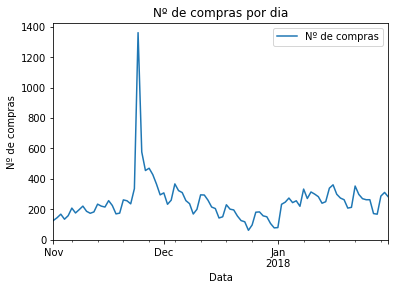

In [83]:
# Recorte aproximado no pico do gráfico

compras_tds_dias['2017-11': '2018-01'].plot()
plt.ylabel('Nº de compras')
plt.xlabel('Data')
plt.title('Nº de compras por dia')
plt.show()

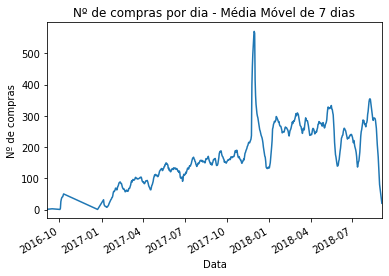

In [84]:
# Visualizando a série inteira com média móvel de 7 dias

compras_tds_dias['7D'] = compras_tds_dias['Nº de compras'].rolling('7D').mean()
compras_tds_dias['7D'].plot()
plt.ylabel('Nº de compras')
plt.xlabel('Data')
plt.title('Nº de compras por dia - Média Móvel de 7 dias')
plt.show()

# Com a média móvel, ficar mais clara a tendência de crescimento

# 2.2 Preços

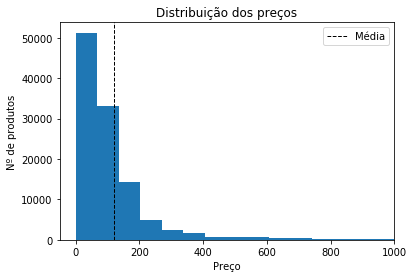

Média dos preços é 120.7 reais


In [85]:
# Distribuição dos preços

plt.hist(df.price, bins=100)
plt.axvline(df.price.mean(), color='k', linestyle='dashed', linewidth=1, label='Média')
plt.legend(loc='upper right')
plt.xlabel('Preço')
plt.ylabel('Nº de produtos')
plt.title('Distribuição dos preços')
plt.xlim(right=1000)
plt.xlim(left=-50)
plt.show()

print('Média dos preços é' ,round(df.price.mean(), 1), 'reais')
#print(((df[df.price > 800].price.count()/df.price.count())*800).round(1))

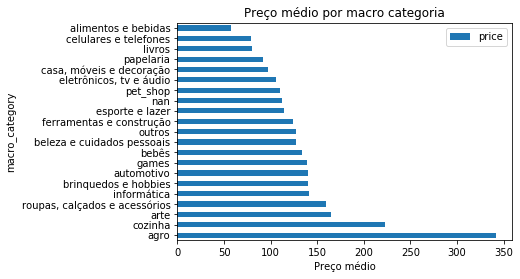

In [86]:
# Média de preços por macro categoria

df.groupby('macro_category').mean().price.sort_values(ascending=False).to_frame().plot(kind='barh')
plt.xlabel('Preço médio')
plt.title('Preço médio por macro categoria')
plt.show()

# Das 3 macro categorias com que mais vendem, roupas sao as mais caras e produtos para casa são os mais baratos

# 2.3 Distância

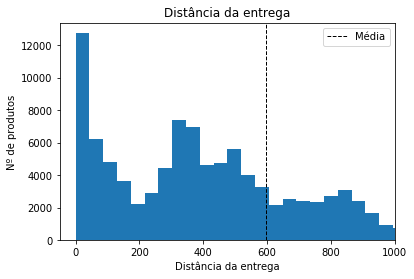

Média da distância prcorrida na entrega é 595.8 kms


In [87]:
# Distribuição dos preços

plt.hist(df.distance, bins=200)
plt.axvline(df.distance.mean(), color='k', linestyle='dashed', linewidth=1, label='Média')
plt.legend(loc='upper right')
plt.xlabel('Distância da entrega')
plt.ylabel('Nº de produtos')
plt.title('Distância da entrega')
plt.xlim(right=1000)
plt.xlim(left=-50)
plt.show()

print('Média da distância prcorrida na entrega é' ,round(df.distance.mean(), 1), 'kms')

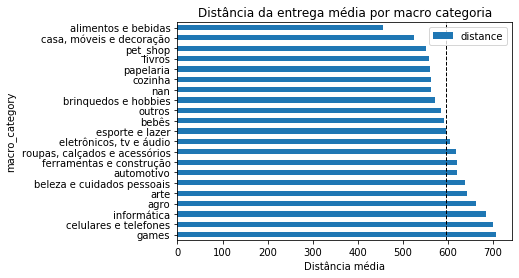

In [88]:
# Média de distância da entrega por macro categoria

df.groupby('macro_category').mean().distance.sort_values(ascending=False).to_frame().plot(kind='barh')
plt.axvline(df.distance.mean(), color='k', linestyle='dashed', linewidth=1, label='Média')
plt.xlabel('Distância média')
plt.title('Distância da entrega média por macro categoria')
plt.show()

# 2.4 Reviews

In [89]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [90]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [91]:
# Média das notas

round(order_reviews_df.review_score.mean(), 1)

4.1

In [92]:
# Número de notas dada, por nota

order_reviews_df.review_score.value_counts().sort_index()

1    11858
2     3235
3     8287
4    19200
5    57420
Name: review_score, dtype: int64

In [93]:
# Filtrando apenas as reviews com mensagem

order_reviews_message = order_reviews_df[order_reviews_df.review_comment_message.notnull()]
order_reviews_message.reset_index(inplace=True)
order_reviews_message

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
4,15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
...,...,...,...,...,...,...,...,...
41748,99983,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
41749,99990,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
41750,99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
41751,99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [94]:
order_reviews_message.review_score.value_counts().sort_index()

1     9179
2     2229
3     3665
4     6034
5    20646
Name: review_score, dtype: int64

# 2.4.1 Palavras mais encontradas

In [95]:
from nltk.tokenize import word_tokenize
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
# Juntando todas as reviews em uma array e colocando as palavra com ltra minúscula

all_reviews_arr = [review.lower() for review in order_reviews_message.review_comment_message]
all_reviews_arr

['recebi bem antes do prazo estipulado.',
 'parabéns lojas lannister adorei comprar pela internet seguro e prático parabéns a todos feliz páscoa',
 'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho',
 'mas um pouco ,travando...pelo valor ta boa.\r\n',
 'vendedor confiável, produto ok e entrega antes do prazo.',
 'gostaria de saber o que houve, sempre recebi e essa compra agora me decpcionou',
 'péssimo',
 'loja nota 10',
 'obrigado pela atençao amim dispensada',
 'a compra foi realizada facilmente.\r\na entrega foi efetuada muito antes do prazo dado.\r\no produto já começou a ser usado e até o presente,\r\nsem problemas.',
 'relógio muito bonito e barato.',
 'não gostei ! comprei gato por lebre',
 'sempre compro pela internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. no stark o prazo máximo já se esgotou e ainda não recebi o p

In [97]:
# Unindo as frases em uma string

all_reviews_str = ','.join(all_reviews_arr)
all_reviews_str

'recebi bem antes do prazo estipulado.,parabéns lojas lannister adorei comprar pela internet seguro e prático parabéns a todos feliz páscoa,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,mas um pouco ,travando...pelo valor ta boa.\r\n,vendedor confiável, produto ok e entrega antes do prazo.,gostaria de saber o que houve, sempre recebi e essa compra agora me decpcionou,péssimo,loja nota 10,obrigado pela atençao amim dispensada,a compra foi realizada facilmente.\r\na entrega foi efetuada muito antes do prazo dado.\r\no produto já começou a ser usado e até o presente,\r\nsem problemas.,relógio muito bonito e barato.,não gostei ! comprei gato por lebre,sempre compro pela internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. no stark o prazo máximo já se esgotou e ainda não recebi o produto.,recebi exatamente o que esperava. as dema

In [98]:
# Dividir o texto em tokens (palavras), retirando números e pontuações

palavras_review = [palavras for palavras in word_tokenize(all_reviews_str) if palavras.isalpha()]

In [99]:
len(palavras_review)

473583

In [100]:
# Usar WordNetLemmatizer() nas palavras, para evitar que hajam singulares e plurais das mesmas palavras.
# Usar stopwords para retirar palavras que se repetem muito (no, de, para, a).

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wordnet_lemmatizer = WordNetLemmatizer()

palavras_lemmantized = [wordnet_lemmatizer.lemmatize(palavras) for palavras in palavras_review]
token_review = [palavras for palavras in palavras_review if palavras not in stopwords.words('portuguese')]

In [101]:
# Podemos ver que houve uma conideravel reducao no número de palavras, após a retiradas das stop words

len(token_review)

281698

In [102]:
# Viualizando palavra mais encontradas
Counter(token_review).most_common(20)

[('produto', 18236),
 ('prazo', 7762),
 ('entrega', 6366),
 ('antes', 5628),
 ('chegou', 5534),
 ('recebi', 5375),
 ('bom', 4370),
 ('entregue', 3772),
 ('recomendo', 3654),
 ('veio', 3335),
 ('bem', 3089),
 ('comprei', 2830),
 ('qualidade', 2515),
 ('ainda', 2349),
 ('tudo', 2343),
 ('loja', 2278),
 ('compra', 2109),
 ('gostei', 1858),
 ('ótimo', 1768),
 ('excelente', 1727)]

In [ ]:
def tokenize()

    df_review = order_reviews_message[order_reviews_message.review_score == i].review_comment_message

    all_reviews_arr = [review.lower() for review in df_review]

    all_reviews_str = ','.join(all_reviews_arr)

    palavras_review = [palavras for palavras in word_tokenize(all_reviews_str) if palavras.isalpha()]

    wordnet_lemmatizer = WordNetLemmatizer()

    palavras_lemmantized = [wordnet_lemmatizer.lemmatize(palavras) for palavras in palavras_review]
    token_review = [palavras for palavras in palavras_review if palavras not in stopwords.words('portuguese')]

# 3.1 Modelo de previsão de tempo de entrega

In [103]:
# Convertendo timedelta em horas, para calcular correlações

hour = df.total_delivery_time.apply(lambda x: x.seconds/3600) + df.total_delivery_time.apply(lambda x: x.days*24)
df['total_delivery_time_hours'] = hour
df.total_delivery_time_hours

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         202.477778
1         330.768889
2         225.461111
3         317.010000
4          68.973056
             ...    
112091    532.649444
112092    596.626111
112093    410.074167
112094    410.074167
112095    184.183333
Name: total_delivery_time_hours, Length: 112096, dtype: float64

In [104]:
# Vrificando se o número de linhas é o mesmo

df.total_delivery_time

0         8 days 10:28:40
1        13 days 18:46:08
2         9 days 09:27:40
3        13 days 05:00:36
4         2 days 20:58:23
               ...       
112091   22 days 04:38:58
112092   24 days 20:37:34
112093   17 days 02:04:27
112094   17 days 02:04:27
112095    7 days 16:11:00
Name: total_delivery_time, Length: 112096, dtype: timedelta64[ns]

In [105]:
# Transformar em df, para rodar a corr sem ter problemas com valores nulos

distancia_tempo = pd.DataFrame({'distancia': df.distance, 'tempo':df.total_delivery_time_hours})
distancia_tempo.corr()

,distancia,tempo
distancia,1.000000,0.394214
tempo,0.394214,1.000000


In [106]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [107]:
df_model = df.dropna()

In [108]:
# Construindo modelo de previsão do tempo de entrega

X = df_model[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price', 'distance']].values

y = df_model.total_delivery_time_hours

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred = modelo.predict(X_test)

In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 132.47919988511387
Mean Squared Error: 43524.87970465843
Root Mean Squared Error: 208.62617214687717


In [113]:
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': ((y_test-y_pred)/y_test*100)})
df_model.head(25)

,Actual,Predicted,Error
89593,125.942222,278.702603,-121.294018
26448,118.163889,213.901902,-81.021380
5721,536.611111,425.740574,20.661245
90003,789.734167,299.862037,62.030003
34077,502.684444,348.674297,30.637540
17865,432.950278,483.757274,-11.735065
46446,222.135556,362.493339,-63.185645
37621,430.865833,283.971980,34.092713
45933,592.485833,324.576019,45.217927
909,320.472222,536.949771,-67.549552
